# Assignment 5

## Task 1 (1 point)

**Normalizing Continuous Features**

Consider data drawn from a 2 dimensional normal distribution. 
Normalize the data by first subtracting the mean from each dimension and then dividing the result by its respective standard deviation. 

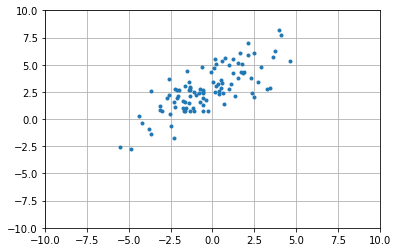

In [1]:
# You don't need to modify this cell

import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# Generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)

# Plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)
plt.show()

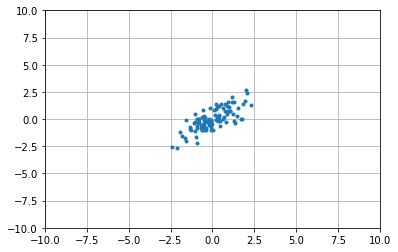

In [2]:
# Normalize data
mu = X.mean(axis=0)
stdev = X.std(axis=0)
Xnormalized = (X - mu) / stdev

plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)
plt.show()

## Task 2 (1 point)

**One-Hot Encoding**

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns an $m \times n$ numpy array, where $m$ is the number of samples and $n$ the number of unique items. Each row corresponds to the one-hot-encoded version of the respective data point in the original list.

*Note*: The output of your solution should be the same as the one from ``sklearn``'s ``OneHotEncoder`` (see below).

In [9]:
data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

def one_hot_encoding(string_list):
    unique_items = np.unique(string_list)
    return np.vstack([unique_items == s for s in string_list]) * 1.

one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [8]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(sparse=False).fit_transform(np.vstack(data))

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Task 3 (2 points)

**Bag-of-Words Features**

Consider the small data set *corpus*.

Implement a function ``bag_of_words`` that takes a list of sentences as strings and transforms them into a (preferably sparse) numpy array of size number-of-data-points-by-number-of-words-in-the-corpus.

Compare your result with the result from [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [12]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [16]:
def bag_of_words(corpus):
    
    def preprocess(s):
        return s.lower()\
                 .replace('?','')\
                 .replace('.','')\
                 .split(" ")
    
    vocab = list(set(preprocess(" ".join(corpus))))
    print(vocab)
    
    all_bow = []
    for s in corpus:
        tmp_words = preprocess(s)
        this_bow = []
        for w in vocab:
            this_bow.append(sum([1 for iw in tmp_words if iw == w]))
        all_bow.append(this_bow)
    return np.array(all_bow)
        
bag_of_words(corpus)

['second', 'this', 'third', 'document', 'and', 'is', 'one', 'first', 'the']


array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 2, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 1]])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(corpus)

word_freqs = vect.transform(corpus).toarray()
word_freqs

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

## Task 4 (1 point)

**Extracting Key Points from Video Frames**

We learnt about **HOG** as classical feature extractors in the lecture. HOG is used in **SIFT descriptors** (**S**cale **I**nvariant **F**eature **T**ransform), which detect so-called **Key Points**. These are useful i.e. for matching corresponding points between an original image and a geometrically or morphologically transformed version of it.

Short introduction here: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

Your task is to complete the missing lines from the code below, which will activate your webcam and extract Key Points on the live stream. You will need the *OpenCV* library for Python, which you can install via ``pip`` on the next line or using ``conda`` on your machine. There is already an example in the link above.

In [ ]:
#!pip install opencv-python

In [2]:
import cv2

cap = cv2.VideoCapture(0)
cv2.namedWindow('SIFT feature visualization')

while True:
    
    # Capture frame-by-frame
    _, frame = cap.read()
    
    # Convert image to gray scale
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    # Localize keypoints
    sift = cv2.SIFT_create()
    kp = sift.detect(frame, None)     
    frame = cv2.drawKeypoints(frame, kp, frame, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Close when pressing 'q'
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    
    # Display image
    cv2.imshow('frame_SIFT', frame)
    
# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

## Task 5 (1 point)

#### Precision and Recall

Implement two functions that compute the precision and recall of binary predictions.

The functions should expect the true and predicted binary categories as numpy vectors, meaning numpy arrays with only one axis as e.g. ``np.array([1, 0, 0, 1])`` where 1 stands for positive prediction and 0 for negative prediction. Make sure that always a number is returned and not a NaN (when the denominator is 0).

In [1]:
def precision(y_true, y_predicted):
    
    tp = sum(y_true & y_predicted)
    fp = sum(y_predicted & ~y_true)
    if (tp + fp) > 0:
        return  tp / (tp + fp)
    else:
        return 0.
    
def recall(y_true, y_predicted):
    
    tp = sum(y_true & y_predicted)
    fn = sum(~y_predicted & y_true)
    if (tp + fn) > 0:
        return  tp / (tp + fn)
    else:
        return 0.

In [3]:
# Test
y_true = np.array([1,0,1,1])
y_predicted = np.array([1,1,0,0])

print(precision(y_true, y_predicted))
print(recall(y_true, y_predicted))

0.5
0.3333333333333333


## Task 6 (4 points)

#### Predicting Ruling Party

In the 17th Bundestag elected in 2009, the ruling parties were CDU/CSU and FDP, in the 18th Bundestag elected in 2013 the ruling parties were CDU/CSU and SPD. Download the [parliament speeches](https://www.dropbox.com/s/1nlbfehnrwwa2zj/bundestags_parlamentsprotokolle.csv.gzip?dl=1) and compute a new target variable 'government' that is true if the respective party was in the ruling coalition at the time. 

First, write a function that loads the dataset into a pandas Dataframe and extends it with a column for 'government'. This column should be filled with booleans marking whether the party was governing or not.

Second, write a function ``train_bundestag`` that preprocesses the data and trains a text classification pipeline that predicts whether a speech was made by the governing party. Train the pipeline on the speeches of the 17th Bundestag and test them on (heldout) data from the 17th Bundestag as well as on data from the 18th Bundestag. 

Fine-tune at least two hyperparameters using some sort of cross validation (2 folds should be enough; the more you set, the longer you wait)!

**Note**: Your scores at the end may differ from the ones in the example, depending on what settings you used for your training.

In [ ]:
import os, gzip
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import urllib.request
from sklearn.metrics import classification_report

DATADIR = "data"

def load_data():
    if not os.path.exists(DATADIR): 
        os.mkdir(DATADIR)

    file_name = os.path.join(DATADIR, 'bundestags_parlamentsprotokolle.csv.gzip')
    if not os.path.exists(file_name):
        url_data = 'https://www.dropbox.com/s/1nlbfehnrwwa2zj/bundestags_parlamentsprotokolle.csv.gzip?dl=1'
        urllib.request.urlretrieve(url_data, file_name)

    df = pd.read_csv(gzip.open(file_name), index_col=0).sample(frac=1)
    df.loc[df.wahlperiode==17,'government'] = df[df.wahlperiode==17].partei.isin(['cducsu','fdp']).astype(str)
    df.loc[df.wahlperiode==18,'government'] = df[df.wahlperiode==18].partei.isin(['cducsu','spd']).astype(str)
    
    return df


def train_bundestag():
    
    # Load data as Dataframe
    df = load_data()

    # Initialize Pipeline for extracting features with sklearn's TfidfVectorizer
    # As a classifier, you may use sklearn's SGDClassifier (use the logistic regression as loss)
    text_clf = Pipeline([('vect', TfidfVectorizer()),
                         ('clf', SGDClassifier(loss='log_loss'))])

    # Define at least one hyperparameter for the ngram
    # Additionally, also add regularization
    parameters = {
        'vect__ngram_range': [(1, 1)],
        'clf__alpha': (np.logspace(-5, -1, 5)).tolist()
    }
    
    # Perform Gridsearch to get the best HPs (2 folds are enough)
    # Use verbose=1 to get the current state printed to the console
    clf = GridSearchCV(text_clf, parameters, cv=2, n_jobs=1, verbose=1)

    # Split dataset (only for the 17th Budestag) into train and test set
    X_train, X_test, y_train, y_test = train_test_split(df.loc[df.wahlperiode==17,'text'], 
                                                        df.loc[df.wahlperiode==17,'government'])
    
    # Train
    clf.fit(X_train, y_train)

    # Test on the test set from the 17th Bundestag
    print("*"*80 + "\nEvaluation on 17th Bundestag held-out data")
    print(classification_report(y_test, clf.predict(X_test)))

    # Test on the whole dataset for the 18th Bundestag
    predictions = clf.predict(df.loc[df.wahlperiode==18,'text'])
    print("*"*80 + "\nEvaluation on 18th Bundestag held-out data")
    print(classification_report(df.loc[df.wahlperiode==18,'government'], predictions))

train_bundestag()